# NY State Pollution Resolution

## Ask 1 - Searching and Identifying a Dataset to Analyze
* Identify and describe your dataset
* Identify dataset source
* Why is important and what appeals to you about it
* Acquire data and perform initial exploration to make sure it is suitable for dimensional modeling and analytical analysis
* Describe the analytical questions you want to answer with the data. (3+ major questions are required)
* Describe any concerns with the data and changes you expect to overcome

### Identify and describe your dataset

For the final project, Group 1 decided to examine a dataset on oil spill incidents that took place in the state of New York. The dataset provides administrative information about each spill that occurred in their DEC region, with a unique seven-digit spill number. Additionally, the dataset also provides information on the program facility name and location, the categorical entities responsible for the spill, the spill date, location, cause, material, material type, quantity spilled, quantity recovered, units measured, affected waterbody, and the close date of the incident (the date when the cleanup activity is complete and all the paperwork for the incident is processed). The dataset is accessible for download in CSV format through the data.gov link here: https://data.ny.gov/api/views/u44d-k5fk/rows.csv. The size of the dataset is 97 MB and was last updated on 12/10/2023, according to Data.gov. The dataset has 500,000+ transactional records and 20 variables. Each record represents a unique spill incident that occurred in the state of New York.

### Identify dataset source

This dataset provides information to help monitor spill incidents that cause environmental damage in New York State, their causes, and their environmental impact. The goal of this dataset is to help the New York Department of Environmental Conservation work alongside their goals to Protect public health, the environment, and improving the health, safety, and welfare of their people. The dataset is extracted from data.ny.gov, which is a website where NY State publishes open source datasets for the purpose of visualization and analysis.

### Why is important and what appeals to you about it

Our group decided to choose this dataset for two reasons:

Firstly, our group wanted to conduct an analysis that would derive valuable insights on a significant topic, such as Environmental Change. Environmental Change is a critical issue that continues to impact us, and we believe that by conducting this analysis, we can identify ways that data and its analysis can be used for the greater good. Specifically, our analysis would help the New York State Department of Environmental Conservation in identifying leading causes of spill incidents, regions with the most environmental contamination, and which areas that require more remediation support. This information would enable the department to conduct more suitable remediation programs or enhance related regulations to benefit the overall environment in New York State.

Secondly, our group selected this dataset because we felt it was suitable for dimensional modeling and analysis. With more than 500,000 unique spill records and over 50 years of data, we believe there is enough transactional data for us to analyze and interpret spill occurrences. Furthermore, with specific columns like contributing_factor, waterbody, source, material_type, and county, we can zoom into specifics to truly understand spill incidents in NY.

### Analytical questions we want to analyzie with this data 

__1)__ Analyze the top 5 waterbodies most significantly impacted by spill quantity and present details regarding the spilled materials and the recovery rate for each waterbody to give more insights into the effectiveness of remediation efforts 

__2)__ Analyze the top 5 sources responsible for spill incidents based on spill quantity and provide an in-depth breakdown of contributing factors associated to each source

__3)__ Analyze the top and bottom 5 sources based on spill recovery rates to assess their efficiencies in resolving matter and identify the counties with better performance in cleaning spills by evaluating resolution rates and recovery rates

### Concerns with the data and limits we expect to overcome

In examining the dataset, we identified a few issues that we decided to address before working with the data and analyzing relationships.

__1) Using csvkit to remove the zip_code:__ The Zip Code column is empty for a majority of records (90.55%, 491,824/543,133 rows), it was acknowledged as a gap in the data by the data dictionary. We have ample other location-based columns in the data to analyze and determine patterns, including Street Intersections of the location (via street 1 and 2), Locality, Country, State-Wide Information System (SWIS) Code, and Department of Environmental Correction (DEC) code 1-7. Additionally, Our analysis is on a state level, hence, the granualarity for Zip Code is not needed, instead, its better for us to examine spill incidents on a County Level.

__2) Dropping and Removing Data from prior to 1978 up until 1996 using SQL (Analyzing 25 Years of Data, from 1997 up until 2023/present):__ We discovered records of spill dates prior to 1978, which raised concerns. According to the sponsor, the New York State Department of Environmental Conservation, the NY State Spill Fund began operating in 1978, but some spills in the dataset occurred before that year, rendering these spills more as estimates. Furthermore, we observed inconsistencies, such as quantities spilled or recovered with null values and different units for the same materials, in the dataset beyond 1978, up until 1996. We attribute these inconsistencies to advancements in technology and incident recording systems. Therefore, our group decided to remove all data from before 1978 until 1996, narrowing our focus to incidents that took place within the past 25 years only.

__3) Addressing Null Values within our Data Columns using SQL:__ Among the 20 columns in our dataset. we have NULL values for street_2, locality, waterbody, and units. We want our want to uniquely identify null values, we decide to change null values as zero for our analysis to ensure that the data would be consistent when running queries and doing visualizations.

__4) Addressing Test Records with our data using SQL:__ We remove records that have "TEST" or "TEST SPILL" within the Program Facility Name as these are clearly test records based on the information within their remaining columns. The number of records of "TEST" or "TEST SPILL" within the Program Facility Name is 15 records. We decided to drop this to avoid inconsistencies when running our queries.

__5) Concerns with the Received and Close Date Columns within the spills table:__ While we were wrangling the data, we discovered NULL values in both the Received Date and Close Date columns. We decided to drop these NULL values. Firstly, NULL values for "Close Date" can indicate either that spills hasn't been cleared yet or that the information is not available. Based on this, We believe we cannot be reasonably sure how to replace these NULL, hence we decided not to. Additionally, in terms of the Received Date the replacing NULL Values would also be merely on assumption rather than reasonable certainity, hence we decided not to drop the NULLs for received date as well.

### Acquire data and perform initial exploration to make sure it is suitable for dimensional modeling and analytical analysis

To examine whether the data is suitable for dimensional modeling and analysis, we decided to run a few preliminary lines of code to load the data and examine its records using CSVkit. Below are the steps we took to check whether the data would be applicable for the case and for the analysis part of the assignment

__Step 1:__ Loading the data using !wget

In [181]:
!wget https://data.ny.gov/api/views/u44d-k5fk/rows.csv

--2023-12-11 05:10:42--  https://data.ny.gov/api/views/u44d-k5fk/rows.csv
Resolving data.ny.gov (data.ny.gov)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.ny.gov (data.ny.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [         <=>        ]  92.05M  3.62MB/s    in 24s     

2023-12-11 05:11:06 (3.87 MB/s) - ‘rows.csv’ saved [96524178]



__Step 2:__ Using !wc -l to count the number of spills recorded within the data

In [182]:
!wc -l rows.csv

543162 rows.csv


__Step 3:__ Using !csvcut -n to list the columns that we will be examining

In [183]:
!csvcut -n rows.csv

  1: Spill Number
  2: Program Facility Name
  3: Street 1
  4: Street 2
  5: Locality
  6: County
  7: ZIP Code
  8: SWIS Code
  9: DEC Region
 10: Spill Date
 11: Received Date
 12: Contributing Factor
 13: Waterbody
 14: Source
 15: Close Date
 16: Material Name
 17: Material Family
 18: Quantity
 19: Units
 20: Recovered


__Step 4:__ Using multiple !csvcut linux codes to see the dataset and it's 20 different columns

In [184]:
!csvcut -c1:5 rows.csv | head -5| csvlook

| Spill Number | Program Facility Name | Street 1            | Street 2 | Locality |
| ------------ | --------------------- | ------------------- | -------- | -------- |
|      107,132 | MH 864                | RT 119/MILLWOOD RD  |          | ELMSFORD |
|      405,586 | BOWRY BAY             | WATER POLL CONTROL  |          | QUEENS   |
|      405,586 | BOWRY BAY             | WATER POLL CONTROL  |          | QUEENS   |
|      204,667 | POLE 16091            | GRACE AVE/BURKE AVE |          | BRONX    |


In [185]:
!csvcut -c6:11 rows.csv | head -5| csvlook

| County      | ZIP Code | SWIS Code | DEC Region | Spill Date | Received Date |
| ----------- | -------- | --------- | ---------- | ---------- | ------------- |
| Westchester |          |     6,000 |          3 | 2001-10-10 |    2001-10-10 |
| Queens      |          |     4,101 |          2 | 2004-08-21 |    2004-08-21 |
| Queens      |          |     4,101 |          2 | 2004-08-21 |    2004-08-21 |
| Bronx       |          |       301 |          2 | 2002-08-02 |    2002-08-02 |


In [186]:
!csvcut -c12:17 rows.csv | head -5| csvlook

| Contributing Factor | Waterbody  | Source                | Close Date | Material Name    | Material Family |
| ------------------- | ---------- | --------------------- | ---------- | ---------------- | --------------- |
| Unknown             |            | Unknown               | 2001-10-15 | unknown material | Other           |
| Other               | EAST RIVER | Unknown               | 2004-09-17 | raw sewage       | Other           |
| Other               | EAST RIVER | Unknown               | 2004-09-17 | raw sewage       | Other           |
| Equipment Failure   |            | Commercial/Industrial | 2002-10-28 | transformer oil  | Petroleum       |


In [187]:
!csvcut -c17:20 rows.csv | head -5| csvlook

| Material Family | Quantity | Units   | Recovered |
| --------------- | -------- | ------- | --------- |
| Other           |       10 | Gallons |     False |
| Other           |        0 | Pounds  |     False |
| Other           |        0 |         |     False |
| Petroleum       |        1 | Gallons |     False |


__Thoughts on the Data:__ 

Our group believes that this data was suitable for dimensional analysis for two reasons:

__1.__ The data has many columns, which will help us build a robust Star Schema and understand each spill based on particular factors like what contributed to it, what material it exposed, and which waterbody it harmed. 

__2.__ There is a significant number of records—more than 500,000—which will make it more reliable to analyze causal relationships between spills.

__Question 1:__
- Analyze the top 5 waterbodies most significantly impacted by spill quantity and present details regarding the spilled materials and the recovery rate for each waterbody to give more insights into the effectiveness of remediation efforts. 

__Question 2:__

- Analyze the top 5 sources responsible for spill incidents based on spill quantity to provide an in-depth breakdowns of contributing factors associated with each source, offering insights into the factors contributing to spills.

__Question 3:__

- Analyze the top and bottom 5 sources based on spill recovery rates to assess the efficiencies of cleanup strategies. Identify the DEC region with better performance in cleaning spills by evaluating resolution rates and recovery rates. Provide guidance on how other DEC regions can benchmark their efforts to achieve cleaner and safer environments in New York State.

In [188]:
!pwd

/home/ubuntu/notebooks/FinalProject


### Additional Information on the Dataset

__Read more about the Dataset from its Overview:__

Please run the code below and it will save a file called "NYSDEC_SpillIncidents_Overview.pdf" in your Working Directory. Open it from your Working Directory to read more!

In [189]:
!curl -L "https://data.ny.gov/api/views/u44d-k5fk/files/dkNFaHGMV5gZ-YPfr7TdMFOyrIIsIYhQ2xfuWjAKdHk?download=true&filename=NYSDEC_SpillIncidents_Overview.pdf" -o NYSDEC_SpillIncidents_Overview.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203k    0  203k    0     0  1476k      0 --:--:-- --:--:-- --:--:-- 1476k


__Read more about the Dataset from its Data Dictionary:__

Please run the code below and it will save a file called "NYSDEC_SpillIncidents_DataDictionary.pdf" in your Working Directory. Open it from your Working Directory to read more!

In [190]:
!curl -L "https://data.ny.gov/api/views/u44d-k5fk/files/r1xCv2Mbfw9yYB8TKrXtrNtESqjtpNY9gWkfVrOhJjY?download=true&filename=NYSDEC_SpillIncidents_DataDictionary.pdf" -o NYSDEC_SpillIncidents_DataDictionary.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  201k    0  201k    0     0  1675k      0 --:--:-- --:--:-- --:--:-- 1675k


### Loading SQL Extensions and Creating the Database on SQL

Our group decided to load the SQL extensions and created the SQL Database prior to Ask 2. We decided to do so to use SQL queries to clean and wrangle the data.

__Step 1:__ Loading the SQL extension using `%load_ext sql` 

In [1]:
%load_ext sql

<u>__Please Run the Step 2 and Step 3 ONLY ONCE__<u>

(You should avoid remaking the database because, you will be overwriting it with the SAME data)

__Step 2:__ Dropping a Database with the Username **_Student_** and the Name **_Group1_FinalAssignment_** 

(Even though this Database may not exist yet, it is general practice when creating a database to drop any existing databases of the same name within the same Username to avoid overwriting them)

In [2]:
!dropdb -U student Group1_FinalAssignment

__Step 3:__ Creating a Database with the Username **_Student_** and the Name **_Group1_FinalAssignment_** 

In [3]:
!createdb -U student Group1_FinalAssignment

__Step 4:__ Connecting the SQL Extension to the Database by first connecting it to Username **_Student_** and then the Database within Student named **_Group1_FinalAssignment_**

In [4]:
%sql postgresql://student@/Group1_FinalAssignment

### Retreiving the Data Dictionary and Creating/Loading the Data onto our SQL Database

__Step 1:__ Using `!head` to retrieve the first 20,000 rows of data from the spills.csv file and then use `csvstat` to run statistics on the records of data. 

(This is helpful in providing us with a breakdown of the different columns within our data set offering insight into the Type of Data, Whether the specific column contains NULL values, and central tendencies of the data. This is provides us an idea of the dataset quickly and helps us create the Data Dictionary accurately)

In [5]:
!pwd

/home/ubuntu/notebooks/FinalProject


In [18]:
!head -n 20000 rows.csv | csvstat

/home/ubuntu/.local/lib/python3.8/site-packages/agate/table/from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  1. "Spill Number"

	Type of data:          Number
	Contains null values:  False
	Unique values:         19308
	Smallest value:        9
	Largest value:         9975548
	Sum:                   114145879030
	Mean:                  5707579.33
	Median:                8910269
	StDev:                 4237250.286
	Most common values:    2301892 (10x)
	                       216106 (6x)
	                       360077 (5x)
	                       4879 (5x)
	                       903093 (4x)

  2. "Program Facility Name"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Unique values:         18115
	Longest value:         58 characters
	Most common values:    + (144x)
	                       @ (42x)
	                       3RD AVE YARD (39x)
	                       13TH ST PUMP STATION (30x)
	              

__Step 2:__ Creating our Table on SQL called spills and assigning the attributes datatypes with limits as per  the results from the above csvstat result

(__Note:__ it is general and common practice to drop a table from our database if it already exists to avoid overwriting it)

In [7]:
%%sql
DROP TABLE IF EXISTS spills;

CREATE TABLE spills (
    spill_number NUMERIC(8) NOT NULL,
    program_facility_name VARCHAR(100) NULL,
    street_1 VARCHAR(50) NULL,
    street_2 VARCHAR(50) NULL,
    locality VARCHAR(50) NULL,
    county VARCHAR(50) NULL,
    zip_code VARCHAR(50) NULL,
    swis_code NUMERIC(5) NOT NULL,
    dec_region INTEGER,
    spill_date DATE NULL,
    received_date DATE NULL,
    contributing_factor VARCHAR(50) NOT NULL,
    waterbody VARCHAR(30) NULL,
    source VARCHAR(50) NOT NULL,
    close_date DATE NULL,
    material_name VARCHAR(100) NOT NULL,
    material_family VARCHAR(20) NOT NULL,
    quantity NUMERIC(15) NOT NULL,
    units CHAR(8) NULL,
    recovered NUMERIC(15) NOT NULL
)

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 3:__ Loading our Table with the Data from our Directory Address.

__Please Note that the Directory address will change based on where you open the file and in which notebook.__ 

Please use `!pwd` to confirm your directory and add 'spills.csv' to the end of it to successfully run the code in Step 3.

In [8]:
!pwd

/home/ubuntu/notebooks/FinalProject


In [9]:
%%sql
COPY spills FROM '/home/ubuntu/notebooks/FinalProject/rows.csv'
CSV
HEADER;

 * postgresql://student@/Group1_FinalAssignment
543161 rows affected.


[]

## Ask 2 - Data Cleaning and Wrangling

* Based on ask 1, wrangle the data into a format suitable for dimensional modeling analysis. This may involve: – Cleaning, filtering, merging , modeling steps
* Describe your process as you proceed and document your notebook files, models
* Be specific about any key decision to modify or remove data. Describe how you overcame any challenges and document all assumptions you made


### Part 1- Addressing Data Concerns

#### 1. Using csvkit to remove the zip_code column using CSVkit and SQL

__Step 1:__ Ensure that we are in the same directory, once again, using `!pwd`

In [10]:
!pwd

/home/ubuntu/notebooks/FinalProject


__Step 2:__ Use `!csvcut -C` to remove the 7th column from the rows.csv file, which is the Zip Code column

In [11]:
!csvcut -C 7 rows.csv > spills.csv

__Step 3:__ Remove downloaded csv file called rows.csv using `!rm` to clean up the working directory

In [12]:
!rm rows.csv

__Step 4:__ Using `!wc-l` to count the number of records within the new csv file created called spills.csv to ensure that no data loss took place 

In [13]:
!wc -l spills.csv

543162 spills.csv


__Step 5:__ Using `!csvcut -n` to list the columns within the new csv file (named spills.csv) to ensure that the column named Zip Code was successfully removed

In [14]:
!csvcut -n spills.csv

  1: Spill Number
  2: Program Facility Name
  3: Street 1
  4: Street 2
  5: Locality
  6: County
  7: SWIS Code
  8: DEC Region
  9: Spill Date
 10: Received Date
 11: Contributing Factor
 12: Waterbody
 13: Source
 14: Close Date
 15: Material Name
 16: Material Family
 17: Quantity
 18: Units
 19: Recovered


__Step 6:__ Drop the Column Zip Code from the SQL Database Table as well

__Note:__ This is a crucial step that could create to confusion later on. We must drop the Zipcode Column within the SQL file as well to ensure consistency within our data!

In [15]:
%%sql
ALTER TABLE spills
DROP COLUMN zip_code

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Please Note:__ The Reason that we drop the column on our csv file and SQL is so, that we have can refer back to the csv file in our working directory if we need to throughout the process.

#### 2. Dropping and Removing Data from before 1997 using SQL

__Step 1:__ Ensure the SQL extension is loaded by running the code: `%load_ext sql` 

In [16]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


__Step 2:__ Connecting the SQL Extension to the Database by first connecting it to Username **_Student_** and then the Database within Student named **_Group1_FinalAssignment_**

In [17]:
%sql postgresql://student@/Group1_FinalAssignment

__Step 3:__ Checking whether we are connected to the SQL Database by seeing whether we can access the Spills Table that we created in our SQL Database

In [18]:
%%sql
SELECT *
FROM spills
Limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
107132,MH 864,RT 119/MILLWOOD RD,None,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,None,Unknown,2001-10-15,unknown material,Other,10,Gallons,0
405586,BOWRY BAY,WATER POLL CONTROL,None,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0


__Step 4:__ Dropping Data for Spill Incidents that took place before 1997 Using SQL `DELETE` and `WHERE` Statements. 

__Note:__ We are deleting records that took place before 1997 by looking at the spill_date column in our spills table, which is the date that each specific spill incident took place.

In [19]:
%%sql
DELETE FROM spills
WHERE spill_date < '1997-01-01';

 * postgresql://student@/Group1_FinalAssignment
153447 rows affected.


[]

__Step 5:__ Seeing the Number of Records after dropping spill incidents before 1997 Using the SQL Count(*) within our query 

__Note:__ We wanted to run this to make sure we still have sufficient data to analyze after we dropped records that occured prior to 1997. The count was greater 250,000 records, which meant that there was sufficient data to carry on with this data set.

In [20]:
%%sql
SELECT count(*)
FROM spills

 * postgresql://student@/Group1_FinalAssignment
1 rows affected.


count
389714


#### 3. Addressing NULL Values within our Data Columns using SQL

__Step 1:__ Using SQL `UPDATE`, `SET`, and `CASE WHEN` Statements to Deal with NULLS within specific columns in our spills table. 

__Note:__ As mentioned above, We were made aware of the NULL Values in the Database after seeing the Data Dictionary in Ask 1, when we used `csvstat` in CSVkit. We generated data on the first 20,000 data records and noticed that these specific records had NULL Values. We decided to replace the NULL values with '0' within our database using `CASE WHEN` Statements so that with could uniquely identify NULLS and deal with NULL values in our queries in future SQL Queries for Ask 3. Please ensure that that the rows affected from this result is the same as the count above (in the previous query).

In [21]:
%%sql
UPDATE spills
SET
    street_1 = CASE WHEN street_1 IS NULL THEN '0' ELSE street_1 END,
    street_2 = CASE WHEN street_2 IS NULL THEN '0' ELSE street_2 END,
    locality = CASE WHEN locality IS NULL THEN '0' ELSE locality END,
    waterbody = CASE WHEN waterbody IS NULL THEN '0' ELSE waterbody END,
    units = CASE WHEN units IS NULL THEN '0' ELSE units END;

 * postgresql://student@/Group1_FinalAssignment
389714 rows affected.


[]

__Step 2:__ Using SQL `SELECT`,`FROM`, and `LIMIT` Statements to see the 5 rows from the spills table to check if the NULL values where dealt with

__Note:__ We observed that the rows in the street_2 column has its NULL values which were replaced with '0', an indicator that we were able to convert the NULLS to '0' successfully.

In [22]:
%%sql
SELECT * 
FROM spills
LIMIT 5;

 * postgresql://student@/Group1_FinalAssignment
5 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
107132,MH 864,RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0
405586,BOWRY BAY,WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0
405586,BOWRY BAY,WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,0,0
204667,POLE 16091,GRACE AVE/BURKE AVE,0,BRONX,Bronx,301,2,2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0
210559,POLE ON,FERDALE LOMIS RD / RT 52,0,LIBERTY,Sullivan,5336,3,2003-01-20,2003-01-20,Traffic Accident,0,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6,Gallons,6


#### 4. Addressing Test Records within our Data using SQL

__Step 1:__ Finding All the Test Spills within our spills Table (Our Dataset)

__Note:__ We were made aware that there are Test Spills within the dataset by examining the dataset in CSV format, hence we decided to find all these occcurences and drop them. In the SQL Query below you can have a look at these instances and note that they don't make up much records of the dataset hence, we can drop them.

In [23]:
%%sql
SELECT *
FROM spills
WHERE program_facility_name LIKE '%TEST SPILL%' OR program_facility_name LIKE '%***TEST%';

 * postgresql://student@/Group1_FinalAssignment
15 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,#2 fuel oil,Petroleum,0,Gallons,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,#2 fuel oil (on-site consumption),Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,Diesel (E-Gen),Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,ethylene glycol,Hazardous Material,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,waste oil/used oil,Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,#2 fuel oil (resale/redistribute),Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,diesel,Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,gasoline,Petroleum,0,0,0
2301892,*** TEST SPILL ***,*** TEST SPILL ***,0,*** TEST SPILL ***,Onondaga,3415,7,2023-06-06,2023-06-06,Tank Test Failure,0,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0,0,0


__Step 2:__ Deleting all Records of the Test Spills within our spills Table (Our Dataset)

In [24]:
%%sql
DELETE FROM spills
WHERE program_facility_name LIKE '%TEST SPILL%' OR program_facility_name LIKE '%***TEST%';

 * postgresql://student@/Group1_FinalAssignment
15 rows affected.


[]

__Step 3:__ Confirming that all the Test Spills were removed from our spills Table (Our Dataset)

__Note:__ The result for this query should be '0 rows affected.'

In [25]:
%%sql
SELECT *
FROM spills
WHERE program_facility_name LIKE '%TEST SPILL%' OR program_facility_name LIKE '%***TEST%';

 * postgresql://student@/Group1_FinalAssignment
0 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered


#### 5. Concerns with the Received and Close Date Columns within the spills table

As addressed above as well, we are unable to handle concerns with the Received and Close Dates for the Spills Table. It would be inaccurate to fill values within the records with NULL Dates because we cannot be reasonably sure about received and close dates and it would be merely an assumption on our end.

### Part 2- Creating our Star Schema, Creating and Loading the Dimension Tables, and Making a Fact Table

#### Creating our Star Schema

Prior to beginning this part, it is important to examine the columns within the spills table to identify which  attributes can serve as measures, which can be placed within fact tables, and plan the Star Schema. The Star Schema will help us create Dimension Tables to run SQL queries and understand causal relationships within the dataset.

__Note:__ This stage was done with our group in-person; however, we are uploading our Final Star Schema here to guide us in creating the multiple Dimension Tables and the single Fact Table.

__Step 1:__ Write out all the attribues within the spills dataset for us to examine

##### Spills Dataset and its Attributes

In [26]:
from IPython.display import Image
Image(url="https://github.com/maneeshtekwani/DMFA_Group1_FinalAssignment/blob/main/Group1_SpillsTable_DMFA_Final.png?raw=true")  

__Step 2:__ Creating the Star Schema after discussing within our group

__Note:__ Spills is our Fact Table and the Tables connecting to it are our Dimensions

##### Star Schema with the Fact Table and Dimension Tables

In [27]:
from IPython.display import Image
Image(url="https://github.com/maneeshtekwani/DMFA_Group1_FinalAssignment/blob/main/Group1_StarSchema_DMFA_Final.png?raw=true")  

#### Creating and Loading the Dimension Tables

##### __1. Creating the Dimension Table for Spill__

__Step 1:__ Creating the Dimension Table for Spill using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary key to uniquely identify our dimension table, which is why we created one when we made the Spill Dimension table.

In [28]:
%%sql
DROP TABLE IF EXISTS spill;

CREATE TABLE spill (
    key SERIAL PRIMARY KEY,
    spill_number NUMERIC
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Spill__  dimension table

In [29]:
%%sql
INSERT INTO spill (spill_number)
SELECT DISTINCT spill_number
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
370995 rows affected.


[]

__Step 3:__ Using SQL Statements `UPDATE`, `SET`, and `WHERE` to update the Nulls within the __Spill__ Dimension Table to '0'

In [30]:
%%sql
UPDATE spill
SET spill_number = 0
WHERE spill_number IS NULL;

 * postgresql://student@/Group1_FinalAssignment
0 rows affected.


[]

__Step 4:__ Using SQL to see whether the Spill Dimension Table was successfully created and whether it has the attributes we need within, which are key and spill_number

In [31]:
%%sql
SELECT *
FROM spill
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


key,spill_number
1,1311468
2,475040


__Step 5:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the spill dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [32]:
%%sql
ALTER TABLE spills 
ADD COLUMN spill_key INTEGER,
ADD CONSTRAINT fk_spill
    FOREIGN KEY (spill_key)
    REFERENCES spill (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 6:__ Checking whether the spill_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [33]:
%%sql
SELECT *
FROM spills
LIMIT 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key
107132,MH 864,RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,None
405586,BOWRY BAY,WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0,None


__Step 7:__ Updating the spills table to match spill_key (a foreign key within the spills table) to key (a primary key within the spill table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [34]:
%%sql
UPDATE spills
SET spill_key = spill.key
FROM spill
WHERE spills.spill_number = spill.spill_number;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 8:__ Checking whether the foreign key is sucessfully referring to the primary key in the spill table. We can check this by seeing whether the column named spill_key in the spills fact table is updated with values now.

In [35]:
%%sql
SELECT *
FROM spills
Limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_number,program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key
107132,MH 864,RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000
204667,POLE 16091,GRACE AVE/BURKE AVE,0,BRONX,Bronx,301,2,2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880


__Step 9:__ Dropping the Column spill_number using SQL statement `DROP COLUMN` from the spills table, since the spill_number is present in the 'spill' table and we are making 'spills' our fact table

In [36]:
%%sql
ALTER TABLE spills
DROP COLUMN spill_number

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 10:__ Checking whether the column spill_number is dropped successfully from spills, our fact table

In [37]:
%%sql
SELECT *
From spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key
MH 864,RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000
POLE 16091,GRACE AVE/BURKE AVE,0,BRONX,Bronx,301,2,2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880


##### __2. Creating the Dimension Table for Program__

__Step 1:__ Creating the Dimension Table for Program using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary key to uniquely identify our dimension table, which is why we created one while we made the Program Dimension table.

In [38]:
%%sql
DROP TABLE IF EXISTS program;

CREATE TABLE program (
    key SERIAL PRIMARY KEY,
    program_facility_name VARCHAR(80)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Program__  dimension table

In [39]:
%%sql
INSERT INTO program (program_facility_name)
SELECT DISTINCT program_facility_name
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
212525 rows affected.


[]

__Step 3:__ Using SQL Statements `UPDATE`, `SET`, and `WHERE` to update the Nulls within the __Program__ Dimension Table to '0'

In [40]:
%%sql
UPDATE program
SET program_facility_name = 0
WHERE program_facility_name IS NULL;

 * postgresql://student@/Group1_FinalAssignment
0 rows affected.


[]

__Step 4:__ Using SQL to see whether the Program Dimension Table was successfully created and whether it has the attributes we need within, which are key and program_facility_name

In [41]:
%%sql
SELECT *
FROM program
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


key,program_facility_name
1,SWARTZ MART
2,RESIDENCE-ABENAKI TRL


__Step 5:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Program dimesion table to the spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [42]:
%%sql
ALTER TABLE spills 
ADD COLUMN program_key INTEGER,
ADD CONSTRAINT fk_program
    FOREIGN KEY (program_key)
    REFERENCES program (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 6:__ Checking whether the program_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [43]:
%%sql
SELECT *
FROM spills
LIMIT 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key
MH 864,RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,None
POLE 16091,GRACE AVE/BURKE AVE,0,BRONX,Bronx,301,2,2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,None


__Step 7:__ Updating the spills table to match program_key (a foreign key within the spills table) to key (a primary key within the program table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [44]:
%%sql
UPDATE spills
SET program_key = program.key
FROM program
WHERE spills.program_facility_name = program.program_facility_name;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 8:__ Checking whether the foreign key is sucessfully referring to the primary key in the program table. We can check this by seeing whether the column named program_key in the spills fact table is updated with values now.

In [45]:
%%sql
SELECT *
FROM spills
Limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


program_facility_name,street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key
BOWRY BAY,WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0,315514,181095
BOWRY BAY,WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,0,0,315514,181095


__Step 9:__ Dropping the Column program_facility_name using SQL statement `DROP COLUMN` from the spills table, since the program_facility_name is present in the 'program' table and we are making 'spills' our fact table

In [46]:
%%sql
ALTER TABLE spills
DROP COLUMN program_facility_name

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 10:__ Checking whether the column program_facility_name is dropped successfully from spills, our fact table

In [47]:
%%sql
SELECT *
From spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key
WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0,315514,181095
WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,0,0,315514,181095


##### 3. Creating the Dimension Table for Location

__Step 1:__ Creating the Dimension Table for Location using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one while we made the Location Dimension table.

In [48]:
%%sql
DROP TABLE IF EXISTS location;

CREATE TABLE location (
    key SERIAL PRIMARY KEY,
    street_1 VARCHAR(50),
    street_2 VARCHAR(50),
    locality VARCHAR(50),
    county VARCHAR(50),
    swis_code NUMERIC(6),
    dec_region INTEGER
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Location__  dimension table

In [49]:
%%sql
INSERT INTO location (street_1, street_2, locality, county, swis_code, dec_region)
SELECT DISTINCT street_1, street_2, locality, county, swis_code, dec_region
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
310699 rows affected.


[]

__Step 3:__ Using SQL to see whether the Location Dimension Table was successfully created and whether it has the attributes we need within, which are key, street_1, street_2, locality, county, swis_code, and dec_region

__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Location dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [50]:
%%sql
ALTER TABLE spills 
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location
    FOREIGN KEY (location_key)
    REFERENCES location (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the location_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [51]:
%%sql
select *
from spills
limit 3

 * postgresql://student@/Group1_FinalAssignment
3 rows affected.


street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key
WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,Pounds,0,315514,181095,None
WATER POLL CONTROL,0,QUEENS,Queens,4101,2,2004-08-21,2004-08-21,Other,EAST RIVER,Unknown,2004-09-17,raw sewage,Other,0,0,0,315514,181095,None
RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,None


__Step 6:__ Updating the spills table to match location_key (a foreign key within the spills table) to key (a primary key within the location table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [52]:
%%sql
UPDATE spills
SET location_key = location.key
FROM location
WHERE spills.street_1 = location.street_1
    AND spills.street_2 = location.street_2
    AND spills.swis_code = location.swis_code
    AND spills.dec_region = location.dec_region;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the location table. We can check this by seeing whether the column named location_key in the spills fact table is updated with values now.

In [53]:
%%sql
SELECT *
FROM spills
limit 3

 * postgresql://student@/Group1_FinalAssignment
3 rows affected.


street_1,street_2,locality,county,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key
FERDALE LOMIS RD / RT 52,0,LIBERTY,Sullivan,5336,3,2003-01-20,2003-01-20,Traffic Accident,0,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6,Gallons,6,31030,51559,246769
GRACE AVE/BURKE AVE,0,BRONX,Bronx,301,2,2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967
RT 119/MILLWOOD RD,0,ELMSFORD,Westchester,6000,3,2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575


__Step 8:__ Dropping the Columns for Location using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'location' table and we are making 'spills' our fact table

In [54]:
%%sql
ALTER TABLE spills
DROP COLUMN street_1,
DROP COLUMN street_2,
DROP COLUMN locality,
DROP COLUMN county,
DROP COLUMN swis_code,
DROP COLUMN dec_region

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the location columns are dropped successfully from spills, our fact table

In [55]:
%%sql
SELECT *
FROM spills
Limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key
2003-01-20,2003-01-20,Traffic Accident,0,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6,Gallons,6,31030,51559,246769
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967


##### __4. Creating the Dimension Table for Day__

__Step 1:__ Creating the Dimension Table for Day using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one when we made the Day Dimension table.

In [56]:
%%sql
DROP TABLE IF EXISTS day;

CREATE TABLE day (
    key SERIAL PRIMARY KEY,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Day__  dimension table

__Note:__ Please note that we decided to choose day as the granularity for this dimension because day is the most granular measure we have avaliable within the date column in the spills dataset. We also used `CAST(TO_CHAR)` and `CASE WHEN` SQL Statements to convert the date table to provide us with month names in the Character Format and inform us whether days were on weekdays or weekends. 

We were able to generate this query with the help of what we learned in class with the Bikeshare Example.

In [57]:
%%sql
INSERT INTO day (day, year, month_of_year_str, month_of_year, day_of_month, 
                  day_of_week_str, day_of_week, is_weekend, is_weekday, 
                  hour_of_day, quarter_of_year)
SELECT DISTINCT TO_CHAR(spill_date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(spill_date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(spill_date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(spill_date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(spill_date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(spill_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(spill_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(spill_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(spill_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(spill_date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(spill_date, 'Q') AS INTEGER) AS quarter_of_year
FROM spills
UNION
SELECT DISTINCT TO_CHAR(received_date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(received_date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(received_date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(received_date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(received_date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(received_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(received_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(received_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(received_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(received_date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(received_date, 'Q') AS INTEGER) AS quarter_of_year
FROM spills
UNION
SELECT DISTINCT TO_CHAR(close_date, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(close_date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(close_date, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(close_date, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(close_date, 'DD') AS INTEGER) AS day_of_month,
    TO_CHAR(close_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(close_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(close_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(close_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(close_date, 'HH24') AS INTEGER) AS hour_of_day,
    CAST(TO_CHAR(close_date, 'Q') AS INTEGER) AS quarter_of_year
FROM spills

 * postgresql://student@/Group1_FinalAssignment
10020 rows affected.


[]

__Step 3:__ Using SQL to see whether the Day Dimension Table was successfully created and whether it has the attributes we need within.

__Note:__ The Day Dimension has additional columns like day_of_the_week_str, is_weekend, is_weekday, hour_of_day, and quarter_of_year, which may seem unnecessary at the moment; however, in the future it would be helpful. It would be helpful if we wanted to assess what quarter had the most spills, what day had the most spills, etc.  in the future.

In [58]:
%%sql
SELECT * FROM day
LIMIT 10

 * postgresql://student@/Group1_FinalAssignment
10 rows affected.


key,day,year,month_of_year_str,month_of_year,day_of_month,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_of_day,quarter_of_year
1,2014-04-02,2014,April,4,2,Wednesday,4,False,True,0,2
2,2009-01-16,2009,January,1,16,Friday,6,False,True,0,1
3,2015-04-10,2015,April,4,10,Friday,6,False,True,0,2
4,2002-09-17,2002,September,9,17,Tuesday,3,False,True,0,3
5,2013-11-04,2013,November,11,4,Monday,2,False,True,0,4
6,2009-11-15,2009,November,11,15,Sunday,1,True,False,0,4
7,2003-08-11,2003,August,8,11,Monday,2,False,True,0,3
8,2022-04-12,2022,April,4,12,Tuesday,3,False,True,0,2
9,2000-08-24,2000,August,8,24,Thursday,5,False,True,0,3
10,1998-05-31,1998,May,5,31,Sunday,1,True,False,0,2


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Day dimension table to the spills fact table. 

We need to Alter the table 3 times since, we need 3 foreign keys for date: spill_day_key, received_day_key, close_day_key.

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

__Step 4.a.i:__ Using the SQL Statement `ALTER TABLE` to create the foreign key named spill_day_key within the spills table

In [59]:
%%sql
ALTER TABLE spills 
ADD COLUMN spill_day_key INTEGER,
ADD CONSTRAINT fk_spill_day
    FOREIGN KEY (spill_day_key)
    REFERENCES day (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 4.a.ii:__ Checking whether spill_day_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [60]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key
2003-01-20,2003-01-20,Traffic Accident,0,Commercial/Industrial,2003-01-22,transformer oil,Petroleum,6,Gallons,6,31030,51559,246769,None
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,None


__Step 4.a.iii:__ Updating the spills table to match spill_day_key (a foreign key within the spills table) to key (a primary key within the date table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [61]:
%%sql
UPDATE spills
SET spill_day_key = day.key
FROM day
WHERE TO_CHAR(spills.spill_date, 'YYYY-MM-DD') = day.day;

 * postgresql://student@/Group1_FinalAssignment
389547 rows affected.


[]

__Step 4.a.iv:__ Checking whether the foreign key is sucessfully referring to the primary key in the date table. We can check this by seeing whether the column named spill_day_key in the spills fact table is updated with values now.

In [62]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key
2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575,5402
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399


__Step 4.b.i:__ Using the SQL Statement `ALTER TABLE` to create the foreign key named received_day_key within the spills table

In [63]:
%%sql
ALTER TABLE spills 
ADD COLUMN received_day_key INTEGER,
ADD CONSTRAINT fk_received_day
    FOREIGN KEY (received_day_key)
    REFERENCES day (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 4.b.ii:__ Checking whether received_day_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [64]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key
2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,None
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,None


__Step 4.b.iii:__ Updating the spills table to match received_day_key (a foreign key within the spills table) to key (a primary key within the date table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [65]:
%%sql
UPDATE spills
SET received_day_key = day.key
FROM day
WHERE TO_CHAR(spills.received_date, 'YYYY-MM-DD') = day.day;

 * postgresql://student@/Group1_FinalAssignment
389618 rows affected.


[]

__Step 4.b.iv:__ Checking whether the foreign key is sucessfully referring to the primary key in the date table. We can check this by seeing whether the column named received_day_key in the spills fact table is updated with values now.

In [66]:
%%sql
SELECT * 
FROM spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key
2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399


__Step 4.c.i:__ Using the SQL Statement `ALTER TABLE` to create the foreign key named close_day_key within the spills table

In [67]:
%%sql
ALTER TABLE spills
ADD COLUMN close_day_key INTEGER,
ADD CONSTRAINT fk_close_day_key
    FOREIGN KEY (close_day_key)
    REFERENCES day (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 4.c.ii:__ Checking whether close_day_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [68]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key
2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,None
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,None


__Step 4.c.iii:__ Updating the spills table to match close_day_key (a foreign key within the spills table) to key (a primary key within the date table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [69]:
%%sql
UPDATE spills
SET close_day_key = day.key
FROM day
WHERE TO_CHAR(spills.close_date, 'YYYY-MM-DD') = day.day;

 * postgresql://student@/Group1_FinalAssignment
379725 rows affected.


[]

__Step 4.c.iv:__ Checking whether the foreign key is sucessfully referring to the primary key in the date table. We can check this by seeing whether the column named close_day_key in the spills fact table is updated with values now.

In [70]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key
2001-10-10,2001-10-10,Unknown,0,Unknown,2001-10-15,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989
2002-08-02,2002-08-02,Equipment Failure,0,Commercial/Industrial,2002-10-28,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573


__Step 5:__ Dropping the Columns for Location using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'day' table and we are making 'spills' our fact table

In [71]:
%%sql
ALTER TABLE spills
DROP COLUMN spill_date,
DROP COLUMN received_date,
DROP COLUMN close_date

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 6:__ Checking whether the columns are dropped successfully from spills, our fact table

In [72]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


contributing_factor,waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key
Unknown,0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989
Equipment Failure,0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573


##### 5. Creating the Dimension Table for Contributing

__Step 1:__ Creating the Dimension Table for Contributing using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary key to uniquely identify our dimension table, which is why we created one while we made the Contributing Dimension table.

In [73]:
%%sql
DROP TABLE IF EXISTS contributing;

CREATE TABLE contributing (
    key SERIAL PRIMARY KEY,
    contributing_factor VARCHAR(50)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Contribution__  dimension table

In [74]:
%%sql
INSERT INTO contributing (contributing_factor)
SELECT DISTINCT contributing_factor
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
14 rows affected.


[]

__Step 3:__ Using SQL to see whether the Contribution Dimension Table was successfully created and whether it has the attributes we need within which are key and contribution_factor 

In [75]:
%%sql
select * 
from contributing

 * postgresql://student@/Group1_FinalAssignment
14 rows affected.


key,contributing_factor
1,Tank Failure
2,Other
3,Unknown
4,Missing Code in Old Data - Must be fixed
5,Equipment Failure
6,Traffic Accident
7,Tank Test Failure
8,Tank Overfill
9,Vandalism
10,Human Error


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Contributing dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [76]:
%%sql
ALTER TABLE spills
ADD COLUMN contributing_key INTEGER,
ADD CONSTRAINT fk_contributing_key
    FOREIGN KEY (contributing_key)
    REFERENCES contributing (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the contribution_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [77]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


contributing_factor,waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key
Unknown,0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,None
Equipment Failure,0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,None


__Step 6:__ Updating the spills table to match contributing_key (a foreign key within the spills table) to key (a primary key within the contribution table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [78]:
%%sql
UPDATE spills
SET contributing_key = contributing.key
FROM contributing
WHERE spills.contributing_factor = contributing.contributing_factor;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the contribution table. We can check this by seeing whether the column named contributing_key in the spills fact table is updated with values now.

In [79]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


contributing_factor,waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key
Unknown,0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3
Equipment Failure,0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5


__Step 8:__ Dropping the Columns for contributing_factor using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'contributing' table and we are making 'spills' our fact table

In [80]:
%%sql
alter table spills
DROP column contributing_factor

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the contributing_factor column is dropped successfully from spills, our fact table

In [81]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key
0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3
0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5


##### 6. Creating the Dimension Table for Waterbody

__Step 1:__ Creating the Dimension Table for Waterbody using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one while we made the Waterbody Dimension table.

In [82]:
%%sql
DROP TABLE IF EXISTS waterbody;

CREATE TABLE waterbody (
    key SERIAL PRIMARY KEY,
    waterbody VARCHAR(30)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Waterbody__  dimension table

In [83]:
%%sql
INSERT INTO waterbody (waterbody)
SELECT DISTINCT waterbody
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
5323 rows affected.


[]

__Step 3:__ Using SQL to see whether the Waterbody Dimension Table was successfully created and whether it has the attributes we need within which are key and waterbody 

In [84]:
%%sql
select * 
from waterbody
limit 5

 * postgresql://student@/Group1_FinalAssignment
5 rows affected.


key,waterbody
1,KENSICO RESVOIR
2,MARSHY AREA
3,JAMAICA WELLS ZONE
4,UPPER RAQUETTE RIVER
5,WESTCOTT BROOK


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Waterbody dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [85]:
%%sql
ALTER TABLE spills
ADD COLUMN waterbody_key INTEGER,
ADD CONSTRAINT fk_waterbody_key
    FOREIGN KEY (waterbody_key)
    REFERENCES waterbody (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the waterbody_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [86]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key
0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,None
0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,None


__Step 6:__ Updating the spills table to match waterbody_key (a foreign key within the spills table) to key (a primary key within the waterbody table) using SQL Statements `UPDATE`, `SET`, `FROM`, and `WHERE`

In [87]:
%%sql
UPDATE spills
SET waterbody_key = waterbody.key
FROM waterbody
WHERE spills.waterbody = waterbody.waterbody;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the waterbody table. We can check this by seeing whether the column named waterbody_key in the spills fact table is updated with values now.

In [88]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


waterbody,source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key
0,Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395
0,Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395


__Step 8:__ Dropping the Columns for waterbody using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'Waterbody' table and we are making 'spills' our fact table

In [89]:
%%sql
alter table spills
DROP column waterbody

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the column columns are dropped successfully from spills, our fact table

In [90]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key
Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395
Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395


##### 7. Creating the Dimension Table for Source

__Step 1:__ Creating the Dimension Table for Source using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one while we made the Source Dimension table.

In [91]:
%%sql
DROP TABLE IF EXISTS source;

CREATE TABLE source (
    key SERIAL PRIMARY KEY,
    source VARCHAR(50)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Source__  dimension table

In [92]:
%%sql
INSERT INTO source (source)
SELECT DISTINCT source
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
16 rows affected.


[]

__Step 3:__ Using SQL to see whether the Source Dimension Table was successfully created and whether it has the attributes we need within, which are key and source,

In [93]:
%%sql
select * 
from source

 * postgresql://student@/Group1_FinalAssignment
16 rows affected.


key,source
1,Railroad Car
2,Commercial/Industrial
3,Tank Truck
4,Unknown
5,Airport/Aircraft
6,Commercial Vehicle
7,Missing Code in Old Data - Must be fixed
8,"Institutional, Educational, Gov., Other"
9,"Major Facility (MOSF) > 400,000 gal"
10,Private Dwelling


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Source dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [94]:
%%sql
ALTER TABLE spills
ADD COLUMN source_key INTEGER,
ADD CONSTRAINT fk_source_key
    FOREIGN KEY (source_key)
    REFERENCES source (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the source_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [95]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key
Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,None
Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,None


__Step 6:__ Updating the spills table to match source_key (a foreign key within the spills table) to key (a primary key within the location table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [96]:
%%sql
UPDATE spills
SET source_key = source.key
FROM source
WHERE spills.source = source.source;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the source table. We can check this by seeing whether the column named source_key in the spills fact table is updated with values now.

In [97]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


source,material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key
Unknown,unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4
Commercial/Industrial,transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2


__Step 8:__ Dropping the Columns for Source using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'source' table and we are making 'spills' our fact table

In [98]:
%%sql
alter table spills
DROP column source

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the column columns are dropped successfully from spills, our fact table

In [99]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key
unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4
transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2


##### 8. Creating the Dimension Table for Material

__Step 1:__ Creating the Dimension Table for Material using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one while we made the Material Dimension table.

In [100]:
%%sql
DROP TABLE IF EXISTS material;

CREATE TABLE material (
    key SERIAL PRIMARY KEY,
    material_name VARCHAR(100),
    material_family VARCHAR(20)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Material__  dimension table

In [101]:
%%sql
INSERT INTO material (material_name, material_family)
SELECT DISTINCT material_name, material_family
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
5276 rows affected.


[]

__Step 3:__ Using SQL to see whether the Material Dimension Table was successfully created and whether it has the attributes we need within, which are key, material_name, and material_family

In [102]:
%%sql
select * 
from material
limit 5

 * postgresql://student@/Group1_FinalAssignment
5 rows affected.


key,material_name,material_family
1,#2 fuel oil,Petroleum
2,#2 fuel oil (on-site consumption),Petroleum
3,#2 fuel oil (resale/redistribute),Petroleum
4,#4 fuel oil,Petroleum
5,#4 fuel oil (on-site consumption),Petroleum


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Material dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [103]:
%%sql
ALTER TABLE spills
ADD COLUMN material_key INTEGER,
ADD CONSTRAINT fk_material_key
    FOREIGN KEY (material_key)
    REFERENCES material (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the material_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [104]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key
unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,None
transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,None


__Step 6:__ Updating the spills table to match material_key (a foreign key within the spills table) to key (a primary key within the Material table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [105]:
%%sql
UPDATE spills
SET material_key = material.key
FROM material
WHERE spills.material_name = material.material_name;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the material table. We can check this by seeing whether the column named material_key in the spills fact table is updated with values now.

In [106]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


material_name,material_family,quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key
unknown material,Other,10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210
transformer oil,Petroleum,1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185


__Step 8:__ Dropping the Columns for material_name and material_family using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'material' table and we are making 'spills' our fact table

In [107]:
%%sql
ALTER TABLE spills
DROP column material_name,
DROP column material_family

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the material columns are dropped successfully from spills, our fact table

In [108]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key
10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210
1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185


##### 9. Creating the Dimension Table for Unit

__Step 1:__ Creating the Dimension Table for Unit using the SQL Statement `CREATE TABLE`

__Note:__ It is common practice to `DROP TABLE` prior to creating a new table to avoid overwriting any information that already exists within the database. Additionally, we need a primary to uniquely identify our dimension table, which is why we created one while we made the Unit Dimension table.

In [109]:
%%sql
DROP TABLE IF EXISTS unit;

CREATE TABLE unit (
    key SERIAL PRIMARY KEY,
    units CHAR(8)
);

 * postgresql://student@/Group1_FinalAssignment
Done.
Done.


[]

In [110]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key
10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210
1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185


__Step 2:__ Using SQL Statement`INSERT INTO` to upload the data from the __Spills__ table to the __Unit__  dimension table

In [111]:
%%sql
INSERT INTO unit (units)
SELECT DISTINCT units
FROM spills;

 * postgresql://student@/Group1_FinalAssignment
3 rows affected.


[]

__Step 3:__ Using SQL to see whether the Unit Dimension Table was successfully created and whether it has the attributes we need within, which are key and units

__Step 5:__ Checking whether the unit_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [112]:
%%sql
select * 
from unit

 * postgresql://student@/Group1_FinalAssignment
3 rows affected.


key,units
1,Gallons
2,0
3,Pounds


__Step 4:__ Using SQL `ALTER TABLE` and other SQL statements to create a foreign key in the spills table that connects the Unit dimesion table to spills fact table

__Note:__ While creating the Dimensions, our Spills Table is gradually and eventually being converted to be the fact table (as seen in the Star Schema)

In [113]:
%%sql
ALTER TABLE spills
ADD COLUMN unit_key INTEGER,
ADD CONSTRAINT fk_unit_key
    FOREIGN KEY (unit_key)
    REFERENCES unit (key);

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 5:__ Checking whether the unit_key is created as a foreign key within in the spills table (which is becoming our fact table) 

In [114]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key,unit_key
10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210,None
1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185,None


__Step 6:__ Updating the spills table to match unit_key (a foreign key within the spills table) to key (a primary key within the location table) using SQL Statements `UPDATE`, `SET`, `FROM` and `WHERE`

In [115]:
%%sql
UPDATE spills
SET unit_key = unit.key
FROM unit
WHERE spills.units = unit.units;

 * postgresql://student@/Group1_FinalAssignment
389699 rows affected.


[]

__Step 7:__ Checking whether the foreign key is sucessfully referring to the primary key in the unit table. We can check this by seeing whether the column named unit_key in the spills fact table is updated with values now.

In [116]:
%%sql
select *
from spills
limit 2

 * postgresql://student@/Group1_FinalAssignment
2 rows affected.


quantity,units,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key,unit_key
10,Gallons,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210,1
1,Gallons,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185,1


__Step 8:__ Dropping the Columns for unit using SQL statement `DROP COLUMN` from the spills table, since the columns are present within 'unit' table and we are making 'spills' our fact table

In [117]:
%%sql
alter table spills
DROP column units

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 9:__ Checking whether the column columns are dropped successfully from spills, our fact table

In [118]:
%%sql
select *
from spills
limit 10

 * postgresql://student@/Group1_FinalAssignment
10 rows affected.


quantity,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key,unit_key
10,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210,1
1,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185,1
6,6,31030,51559,246769,9129,9129,4695,6,1395,2,5185,1
0,0,315514,181095,306337,4631,4631,1747,2,481,4,5017,2
0,0,315514,181095,306337,4631,4631,1747,2,481,4,5017,3
40,40,291045,191451,6250,5040,7792,8609,5,1395,2,557,1
10,0,328466,31593,30803,556,556,7150,5,1395,2,557,1
1,0,169574,26613,3,3213,3213,6490,5,1395,6,557,1
0,0,306960,93693,50398,5478,5478,9520,7,1395,10,1,1
0,0,279755,167784,50407,2792,2792,9520,7,1395,2,1,2


##### Checking that the Spills Fact Table is created successfully

__Note:__ We created the Spills Fact Table gradually and incrementally when creating the 9 Dimensions above by dropping the columns and inserting foreign keys. Please Note that the 9 Dimensions are spill, program, location, day, contributing, waterbody, material, and unit. The Fact table is named Spills which connects to all these dimensions. Also note, the fact table, spills, has two measures quantity and recovered. Quantity refers to the amount spilled and Recovered refers to the amount recover in each spill incident.

In [120]:
%%sql
select *
from spills
limit 10

 * postgresql://student@/Group1_FinalAssignment
10 rows affected.


quantity,recovered,spill_key,program_key,location_key,spill_day_key,received_day_key,close_day_key,contributing_key,waterbody_key,source_key,material_key,unit_key
10,0,131000,146951,287575,5402,5402,6989,3,1395,4,5210,1
1,0,157880,206752,249967,8399,8399,2573,5,1395,2,5185,1
6,6,31030,51559,246769,9129,9129,4695,6,1395,2,5185,1
0,0,315514,181095,306337,4631,4631,1747,2,481,4,5017,2
0,0,315514,181095,306337,4631,4631,1747,2,481,4,5017,3
40,40,291045,191451,6250,5040,7792,8609,5,1395,2,557,1
10,0,328466,31593,30803,556,556,7150,5,1395,2,557,1
1,0,169574,26613,3,3213,3213,6490,5,1395,6,557,1
0,0,306960,93693,50398,5478,5478,9520,7,1395,10,1,1
0,0,279755,167784,50407,2792,2792,9520,7,1395,2,1,2


## Ask 3 - Data Exploration
* Explore and analyze your data Q1 (Provide all queries in the notebook that answer the questions, Be clear on the answers you discover and whether the results match your expectations, Include charts or other visuals that support your analysis)

* Explore and analyze your data Q2 (Provide all queries in the notebook that answer the questions, Be clear on the answers you discover and whether the results match your expectations, Include charts or other visuals that support your analysis)

* Explore and analyze your data Q3 (Provide all queries in the notebook that answer the questions, Be clear on the answers you discover and whether the results match your expectations, Include charts or other visuals that support your analysis)

### __Question 1: Examining the Waterbodies, Spilled Material, and Recovery Rate__

Analyze the top 5 waterbodies most significantly impacted by spill quantity and present details regarding the spilled materials and the recovery rate for each waterbody to give more insights into the effectiveness of remediation efforts.

Our Group felt the need to split this query into two parts. Intitally examining the most effected/polluted waterbodies was important; however, we must also provide information on what kind of materials are spilled so, the NY State Department of Remediation can set out policies to rectify or remediate the problem. Each material spilled has different retrieval methods and effects on the waterbody so, it is important the sponsor is aware of what material were spilled to assess the importance of addressing one waterbody over another and their approach in cleaning up.

__Part 1:__ Assess the Most Affected Waterbodies & __Part 2:__ Provides insight into the spilled materials and their recovered rates to inform how much of a specific material exist in a particular waterbody (helping with the clean up and recovery of the specific material process)

#### Part 1: Examining the Top 5 Waterbodies

__Step 1:__ Writing an SQL Query to identify which waterbodies had the highest count of spills.

__Note:__ In this step, we are first running a query to briefly examine the Waterbodies. We are looking primarily for the Outliers that we will address in the Next Step. 

In [121]:
%%sql
SELECT 
    count(*), w.waterbody, SUM(quantity) AS spill_quantity
FROM 
    spills s 
JOIN 
    waterbody w ON s.waterbody_key = w.key 
GROUP BY
    w.waterbody 
ORDER BY
    count(*) DESC 
LIMIT 15;

 * postgresql://student@/Group1_FinalAssignment
15 rows affected.


count,waterbody,spill_quantity
364393,0,100076898658
1839,HUDSON RIVER,28953062
858,EAST RIVER,26567011
664,NONE,590217
544,CREEK,1089351
390,N/A,15737
384,NIAGARA RIVER,1338235
378,LONG ISLAND SOUND,13662437
297,STREAM,28435
296,LAKE GEORGE,5808


__Step 2:__ Creating a view that filters the waterbodies that have been affected most by petroleum spills by quantity (which is the quantity spilled)

__Note:__ In the above step, we observe that there are spill incidents with waterbody names that don't offer any unique location or value (Such as '0','NONE','CREEK','N/A','STREAM','POND','UNKNOWN'), hence, for these waterbodies we are using the `NOT IN` SQL Statement to make sure that we don't obeserve these waterbodies when examining Top Waterbodies by their Spill Quantity. 

__Explanation of the Code:__ 
* We need to examine the Top Waterbodies by waterbody name, count, spill quantity, and units. Hence we are using the `JOIN` SQL Statement to join the tables waterbody, unit,and material. 
* Additionally, We are joining by the day table to avoid counting one unique spill twice. 
* We want to look at the data that has units in "Gallons" and material_family of "Petroleum" because it is consistently the most common units and material_family within the Spills Dataset.
* Additionally, we are also looking at the Years from 2002 onwards and dealing with the NULL quantities by looking only for quantity values greater than 0

In [122]:
%%sql
CREATE OR REPLACE VIEW top_waterbody AS
SELECT 
    w.waterbody,
    count(*) AS number_of_spills,
    SUM(s.quantity) AS spill_quantity,
    u.units
FROM
    spills AS s
JOIN
    waterbody w ON s.waterbody_key = w.key
JOIN
    unit u ON s.unit_key = u.key
JOIN
    day d ON s.spill_day_key = d.key
JOIN
    material m ON s.material_key = m.key
WHERE
    w.waterbody NOT IN ('0','NONE','N/A','STREAM','POND','UNKNOWN')
    AND
    u.units = 'Gallons'
    AND
    s.quantity > 0
    AND
    m.material_family = 'Petroleum'
    AND
    d.year > '2002'
GROUP BY
    w.waterbody, u.units
ORDER BY
    spill_quantity DESC
;

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 3:__ Using the View we created above to get only the Top 5 Most Affected Waterbodies

In [123]:
%%sql
SELECT * FROM top_waterbody LIMIT 5;

 * postgresql://student@/Group1_FinalAssignment
5 rows affected.


waterbody,number_of_spills,spill_quantity,units
"GARDENER CREEK, OSWE",1,16000000,Gallons
LONG ISLAND SOUND,62,13044739,Gallons
BUFFALO RIVER,6,3192146,Gallons
STONY CREEK,2,3000002,Gallons
HUDSON RIVER,211,2452006,Gallons


__Step 4:__ Extracting the SQL query data into Python for Visualization purposes

In [124]:
sum_waterbody = _

__Step 5:__ Converting the Data into a Panda DataFrame and Using Seaborn and Matplotlib Python Libraroes for Visualizing the Top 5 Waterbodies by Spill Quantity

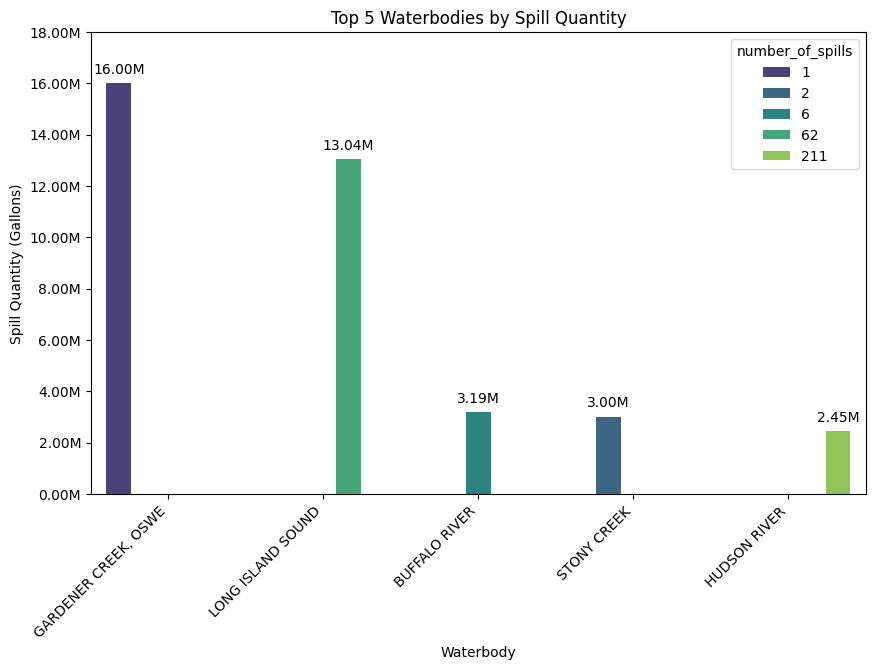

In [125]:
# Importing Pandas, Seaborn, and Matplotlib Libraries to use for visualization purposes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sum_WB = pd.DataFrame(sum_waterbody)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='waterbody', y='spill_quantity',hue='number_of_spills', data=sum_WB, palette='viridis')

#Labeling the X and Y axes, and Putting a Title on the Plot
plt.title('Top 5 Waterbodies by Spill Quantity')
plt.xlabel('Waterbody')
plt.ylabel('Spill Quantity (Gallons)')
plt.yticks(ticks=plt.yticks()[0], labels=['{:.0f}'.format(label) for label in plt.yticks()[0]])
plt.xticks(rotation=45,ha='right')

def format_func(value, tick_number):
    return '{:.2f}M'.format(value / 1000000)

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches:
    label = format_func(p.get_height(), None)
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Presenting the Plot
plt.show()

#### Observations for Query 1, Part 1

As you can see above the Data shows the Top 5 Water Bodies and their names on the X axis, their Spilled Quantities on the Y axis, and the Colors represents the number of Spills that have occured within that waterbody since 2002. We can easily observe that Gardener Creek Oswe is the most polluted waterbody in the State of NY in the last 2 decades. Polluted with almost 16 million gallons of Petroleum spilled in only 1 spill incident, Gardener Creek is most negatively effected waterbody. It will be the Top Concern for the NY State Department of Environmental Remediation to rectify this since, it will have most devasting impact on the Waterbody and the overall envrionment. Long Island Sound with more than 62 spills since 2002 is also a top concern since it is the second highest in terms of Spill Quantity. Stony Creek with only 2 spills has almost the same quantity spilled as Buffalo River, which would mean that Stony Creek must be addressed first and then Buffalo River should be examined. Hudson River is the least polluted waterbody with 211 spills and the lowest spill quantity of Petroleum. Our group attributes this mainly to the fact that the Hudson River is one of the most prominent waterbodies in the state of NY, hence there might be stricter laws/policies on polluting its waterbodies. The NY State Department should be proud of their work in setting strict policies for the Hudson River because it seems to be working and the detrimental effects of petroleum pollution has lessened within the last two decades.

__Agenda:__
1. Gardener Creek Oswe is a Top Concern (1 Spill of 16 million gallons!)
2. Long Island Sound is High Concern (2 spills of 12 million gallons)
3. Buffalo River is Medium Concern (4 spills of 4 million gallons)
4. Stony Creek is Low-Medium Concern (6 spills of less than 4 million gallons)
5. Hudson River is Low Concern (211 spills of 2 million gallons). Should be used as a case-study example to set laws and regulations to deter people from polluting the other four waterbodies.

#### Part 2: Examing the Top 5 Waterbodies with a Distribution of the Specific Petroleum Materials Spilled

__Step 1:__ For Each of the Waterbodies Above, Looking at the Distribution of Petroleum Materials that caused the most spills

__Note:__ We used `RANK()` and `PARTITION BY` to rank the materials and count the quantity (spilled quantity) within particular waterbodies by count

In [126]:
%%sql
WITH rankedSpillWB AS
    (SELECT 
        w.waterbody,
        m.material_name,
        m.material_family,
        count(*) AS number_of_spills,
        SUM(quantity) AS spill_quantity,
        SUM(recovered) AS recovered_quantity,
        u.units,
        RANK() OVER (PARTITION BY w.waterbody ORDER BY SUM(quantity) DESC) as material_rank
    FROM
        spills AS s
    JOIN
        waterbody w ON s.waterbody_key = w.key
    JOIN
        material m ON s.material_key = m.key
    JOIN
        unit u ON s.unit_key = u.key
    JOIN 
        day d ON s.spill_day_key = d.key
    WHERE
        w.waterbody IN (SELECT waterbody FROM top_waterbody LIMIT 5)
        AND
        u.units = 'Gallons'
        AND
        d.year > '2002'
        AND
        s.quantity > 0
        AND
        m.material_family = 'Petroleum'
    GROUP BY
        w.waterbody, 
        m.material_name, 
        u.units,
        m.material_family
    ORDER BY 
        waterbody)
SELECT
    *
FROM 
    rankedSpillWB
WHERE
    material_rank < 6;

 * postgresql://student@/Group1_FinalAssignment
17 rows affected.


waterbody,material_name,material_family,number_of_spills,spill_quantity,recovered_quantity,units,material_rank
BUFFALO RIVER,diesel,Petroleum,3,3192076,0,Gallons,1
BUFFALO RIVER,bunker c oil,Petroleum,1,30,0,Gallons,2
BUFFALO RIVER,unknown petroleum,Petroleum,1,30,0,Gallons,2
BUFFALO RIVER,hydraulic oil,Petroleum,1,10,0,Gallons,4
"GARDENER CREEK, OSWE",#6 fuel oil,Petroleum,1,16000000,0,Gallons,1
HUDSON RIVER,#2 fuel oil,Petroleum,26,2370354,0,Gallons,1
HUDSON RIVER,diesel,Petroleum,49,51058,204,Gallons,2
HUDSON RIVER,gasoline,Petroleum,23,19753,10,Gallons,3
HUDSON RIVER,crude oil,Petroleum,1,5000,0,Gallons,4
HUDSON RIVER,dielectric fluid,Petroleum,3,1258,0,Gallons,5


__Step 2:__ Extracting the Top 5 Waterbody Spill Distribution Data into Python

In [127]:
material_top_5_WB = _

__Step 3:__ Visualizing the Top 5 Waterbody Spill Distribution Data

We wanted to Examine the Top 5 Waterbodies and examine which material_name had the highest frequency of spills within the waterbody

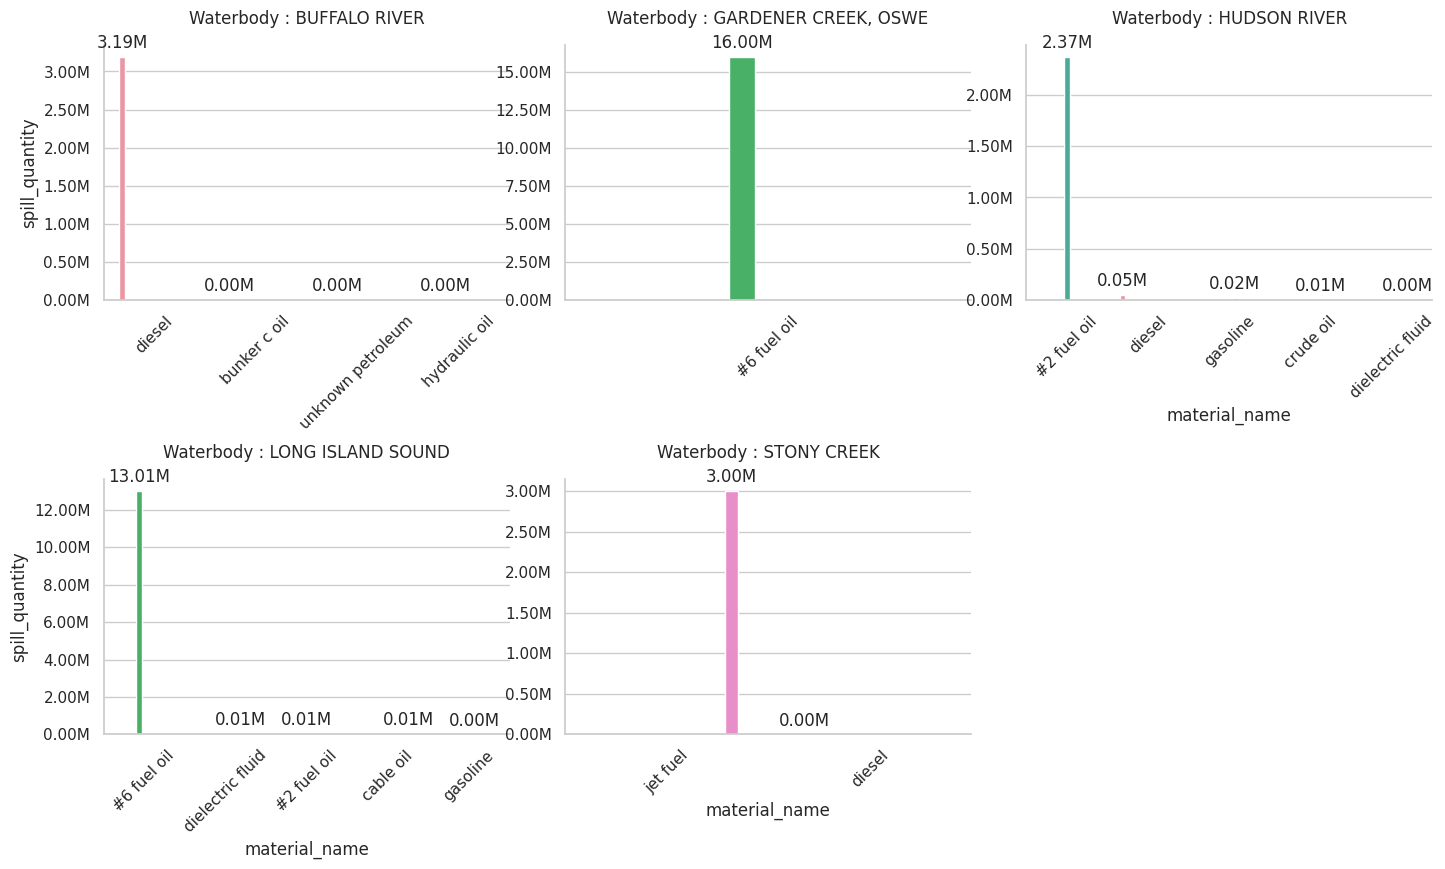

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

top_5_WB_dist = pd.DataFrame(material_top_5_WB)

def format_func(value, tick_number):
    return '{:.2f}M'.format(value / 1000000)

g = sns.catplot(
    data=top_5_WB_dist,
    col='waterbody',  # Separate plots based on the values in 'category1'
    x='material_name',    # Separate data into slices based on the values in 'category2'
    kind='bar',       # Specify the type of plot as pie chart
    y='spill_quantity',      # The numeric values determining the size of each slice
    col_wrap=3,       # Number of columns in the grid (adjust as needed)
    height=4,         # Height of each subplot
    width=0.7,
    aspect=1.2,       # Aspect ratio of each subplot
    hue='material_name',   # Different colors for each category in 'category2'
    sharey=False,
    sharex=False
)

# Setting the plot labels and title
g.set_titles('Waterbody : {col_name}',size=12, pad=15)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))
    for p in ax.patches:
        val = p.get_height()/1000000
        ax.annotate(f'{val:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
        

# Show the plot
plt.subplots_adjust(hspace=0.7)
plt.show()

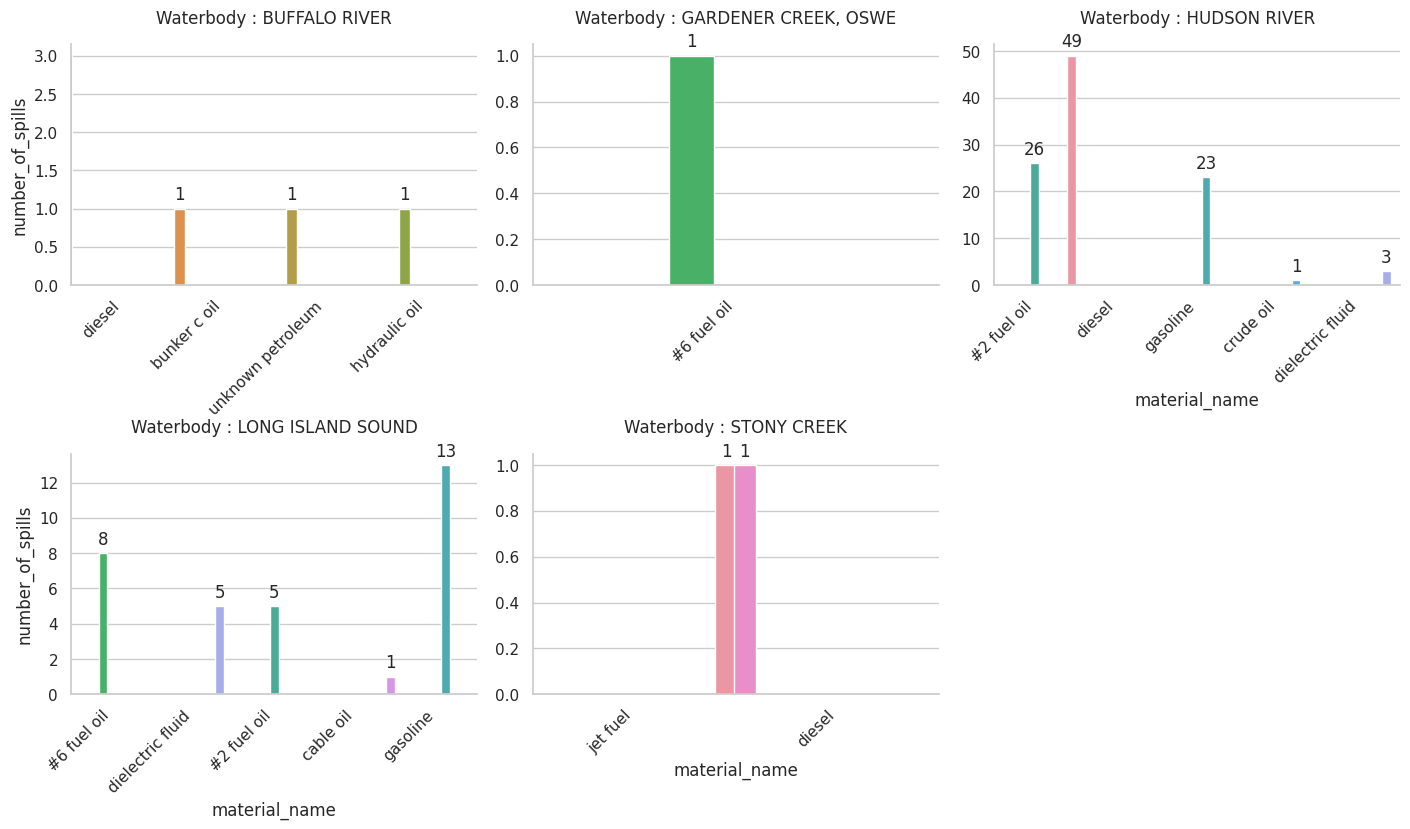

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Create a catplot with pie charts
g = sns.catplot(
    data=top_5_WB_dist,
    col='waterbody',  # Separate plots based on the values in 'category1'
    x='material_name',    # Separate data into slices based on the values in 'category2'
    kind='bar',       # Specify the type of plot as pie chart
    y='number_of_spills',      # The numeric values determining the size of each slice
    col_wrap=3,       # Number of columns in the grid (adjust as needed)
    height=4,         # Height of each subplot
    width=1.2,
    aspect=1.2,       # Aspect ratio of each subplot
    hue='material_name',   # Different colors for each category in 'category2'
    sharey=False,
    sharex=False
)

# Set plot labels and title
g.set_titles('Waterbody : {col_name}',size=12, pad=15)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')   

# Show the plot
plt.subplots_adjust(hspace=0.7,top=0.9)
plt.show()

#### Observations on Part 2

Prior to Examining the Results, We must focus on the Agenda from Part 1 to address it.

1. Gardner Creek Oswego is a Top Concern (1 Spill of 16 million gallons!)
* We can clearly observe that the spill of the top most concern is Garderner Creek, but we notice that the spilled material_name was #6 fuel oil, which is used in industrial burners and bunker fuel for ocean travelling vessels. Gardner Creek Oswego is a stream within the US and Canada; therefore, we can assume that vessels are spilling this form of petroleum into the ocean. To rectify this, the NY State of Remediation must discuss some policies to contain these spills. 

2. Long Island Sound is High Concern (2 spills of 12 million gallons)
* We can notice that Gasoline is the highest polluted material within this waterbody. The NY State of Remediation must discuss better ways to reverse pollution of Gasoline in this Waterbody.

3. Buffalo River is Medium Concern (4 spills of 4 million gallons)
* We can notice that Buffalo River has 4 spills and diesel is the most spilled quantity.

4. Stony Creek is Low-Medium Concern (6 spills of less than 4 million gallons)
* We can notice that Stony Creek has two different kinds of spills which are jetfuel and diesel. Both material_names have a detrimental effect on the environment. It is important that this must be addressed additionally to reverse the environmental effects.

5. Hudson River is Low Concern (211 spills of 2 million gallons).
* The Spilled material that is highest is diesel, which must be a result from vessel spilling.

### __Question 2: Top Sources of Spills and their Contributing Factors__

Analyze the top 5 sources responsible for spill incidents based on spill quantity to provide an in-depth breakdowns of contributing factors associated with each source, offering insights into the factors contributing to spills.

#### __Business Case__
We are focusing on top sources and its associated contributing factors because as a government agency trying to regulate and control spills we need to direct our effort towards the root causes and mitigate the circumstances around it through the policies we can enforce. So by looking at the sources/contributing factor we can have more actionable criterion. 

Note: Since 90% of the spills are Petroleum spills, we are focusing only on that category for our analysis, insights and decision making 

#### __Strategy of Analysis__
* Get Top 5 Sources based on aggregated Spill Quantity for Petroleum
* Find the Top Contributing Factors for each of the top 5 sources 

#### __Part I:__ Getting the Top 5 Sources of Petroleum Spills

__Step 1:__ Creating a view that will give the top_sources

In [130]:
%%sql
CREATE OR REPLACE VIEW top_sources AS
SELECT 
    so.source,
    count(*) number_of_spills,
    SUM(sp.quantity) spill_quantity,
    u.units
FROM
    spills sp
JOIN
    source so ON sp.source_key = so.key
JOIN
    contributing c ON sp.contributing_key = c.key
JOIN
    unit u ON sp.unit_key = u.key
JOIN
    day d ON sp.spill_day_key = d.key
WHERE
    u.units = 'Gallons'
    AND
    d.year > '2002'
    AND
    sp.quantity > 0
GROUP BY
    so.source,
    u.units
ORDER BY
    spill_quantity DESC
;



 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 2:__ Only filtering the top 5 from the query above

In [131]:
%%sql
SELECT * FROM top_sources LIMIT 5;

 * postgresql://student@/Group1_FinalAssignment
5 rows affected.


source,number_of_spills,spill_quantity,units
Commercial/Industrial,36647,119298687,Gallons
"Major Facility (MOSF) > 400,000 gal",985,62317050,Gallons
"Institutional, Educational, Gov., Other",7535,19794958,Gallons
Airport/Aircraft,694,3431416,Gallons
Private Dwelling,23347,3207654,Gallons


__Step 3:__ Extracting the results to pandas

In [132]:
import pandas as pd
results = _
top_5_sources = pd.DataFrame(results)

__Step 4:__ Visualizing the To 5 Sources

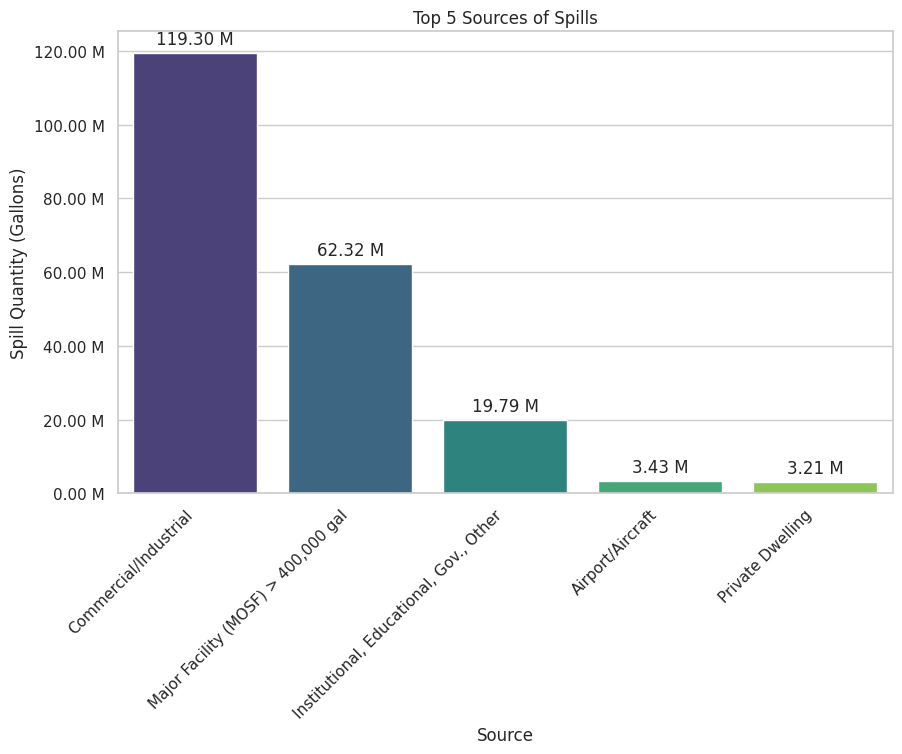

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a stacked bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='source', y='spill_quantity',  data=top_5_sources, palette='viridis')


# Customize the plot
plt.title('Top 5 Sources of Spills')
plt.xlabel('Source')
plt.ylabel('Spill Quantity (Gallons)')
plt.xticks(rotation=45,ha='right')

def format_func(value, tick_number):
    return '{:.2f} M'.format(value / 1000000)

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches:
    label = format_func(p.get_height(), None)
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Show the plot
plt.show()

#### __Part II:__ Getting the Distribution of the top 5 Sources by their Contributing Factors

__Step 1:__ Use the first query to filter top 5 sources and then match them with their contributing factors while ranking adn filtering for top 5 again

In [134]:
%%sql
WITH rankedSourceContrib AS
    (SELECT 
        so.source,
        c.contributing_factor,
        count(*) number_of_spills,
        SUM(sp.quantity) spill_quantity,
        u.units,
        RANK() OVER (PARTITION BY so.source ORDER BY SUM(sp.quantity) DESC) as source_rank
    FROM
        spills sp
    JOIN
        source so ON sp.source_key = so.key
    JOIN
        contributing c ON sp.contributing_key = c.key
    JOIN
        unit u ON sp.unit_key = u.key
    JOIN
        material m ON sp.material_key = m.key
    JOIN
        day d On sp.spill_day_key = d.key
    WHERE
        so.source IN (SELECT source FROM top_sources LIMIT 5)
        and
        c.contributing_factor NOT IN ('Other','Unknown')
        and
        u.units = 'Gallons'
        and
        d.year > '2002'
        and
        sp.quantity > 0
    GROUP BY
        so.source,
        u.units,
        c.contributing_factor
    ORDER BY
        spill_quantity DESC)

SELECT * FROM rankedSourceContrib
WHERE source_rank < 6
ORDER BY source, source_rank


 * postgresql://student@/Group1_FinalAssignment
25 rows affected.


source,contributing_factor,number_of_spills,spill_quantity,units,source_rank
Airport/Aircraft,Equipment Failure,449,10303,Gallons,1
Airport/Aircraft,Human Error,146,2151,Gallons,2
Airport/Aircraft,Deliberate,1,200,Gallons,3
Airport/Aircraft,Traffic Accident,8,164,Gallons,4
Airport/Aircraft,Storm,1,80,Gallons,5
Commercial/Industrial,Equipment Failure,22160,86530640,Gallons,1
Commercial/Industrial,Storm,894,21727452,Gallons,2
Commercial/Industrial,Human Error,3740,1177391,Gallons,3
Commercial/Industrial,Deliberate,399,1109882,Gallons,4
Commercial/Industrial,Traffic Accident,1575,235978,Gallons,5


__Step 2:__ Importing Query Output to Pandas

In [135]:
source_dist = _

import pandas as pd

source_dist = pd.DataFrame(source_dist)

source_dist.to_csv('source_dist.csv', index=False)

__Step 3:__ Visualizing the Results by distribution of Contributing Factor for Each Source

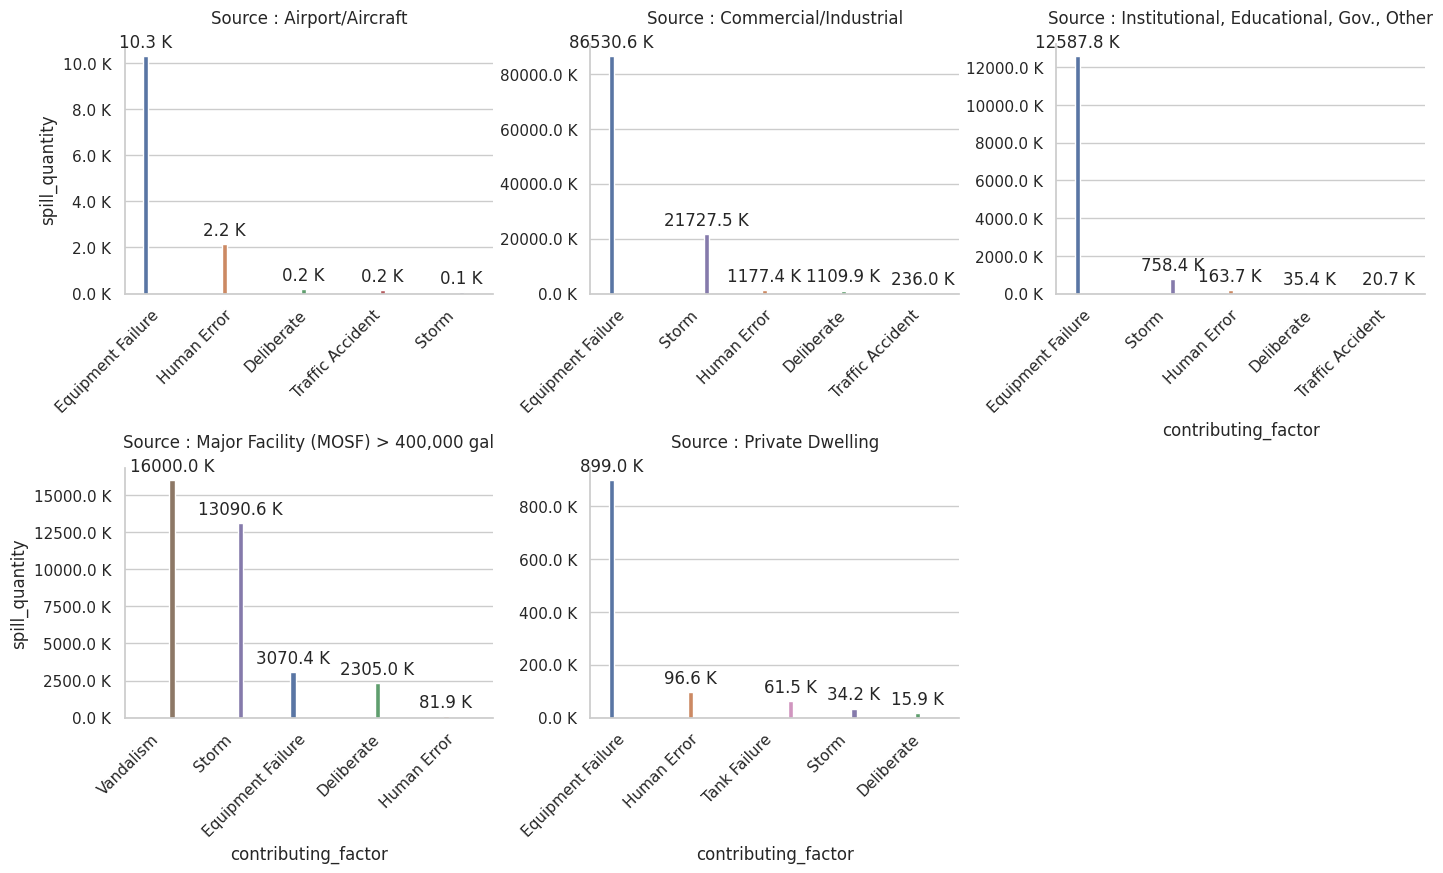

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

def format_func(value, tick_number):
    return '{:.1f} K'.format(value / 1000)

g = sns.catplot(
    data=source_dist,
    col='source', 
    x='contributing_factor', 
    kind='bar',      
    y='spill_quantity',    
    col_wrap=3,      
    height=4,         
    width=0.5,
    aspect=1.2,      
    hue='contributing_factor', 
    sharey=False,
    sharex=False
)


g.set_titles('Source : {col_name}',size=12, pad=15)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))
    for p in ax.patches:
        val = p.get_height()/1000
        ax.annotate(f'{val:.1f} K', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')   


plt.subplots_adjust(hspace=0.7)
plt.show()


#### __Business Outcomes and Findings:__

* As seen from the results above the top 5 sources are as follows:
    * Commercial/Industrial
    * Major Facility
    * Institutional, Educational, Gov, Other
    * Airport/Aircraft
    * Private Dwelling
* For 4 of the 5 top 5 sources most common reason of spills is __Equipment Failure__, meaning need to focus on actions for the mitigation of such incidents. Some possible alleviating programs could be:
    * Introducing more stringment requirements around maintainance protocols
    * Requiring more training certification for handling petroleum products
    * Plan end of life rules for machines involving the pipeline of petroleum products
* __Storms__ (or weather related issues) is standout cause for spills for many and to prevent such spills, weather proofing specific laws could be put in place to protext from future spills
* __Major facilities__ tend to be the most impacted by __Vandalism__ that cause the majority of the spills so there's more need to have security protocols for those sources to mitigate the circumstances

* __Major facilities__ experience the most substantial spill volumes, suggesting that large-scale operations are the most significant contributors to spill incidents and should be a primary focus for spill prevention efforts.

* __Human error__ is a notable factor in spills at private dwellings, highlighting the importance of public awareness and education on spill prevention in residential areas.



### __Question 3__: Resolution Time and Recovery Rate by County
Analyze the top and bottom 5 counties based on spill recovery rates to assess their efficiencies in resolving matter and identify the counties with better performance in cleaning spills by evaluating resolution rates and recovery rates

#### __Business Case__
After analysing the impact on waterbodies, sources and contributing factors, another important metric we need for informed decision making and efficient resources allocation as a government regulating agency is to look at the effectiveness or the ability to deal with spills that are not prevented even after mitigation techniques. To analyse those metrics we look at the recovery percentage of the spills by county and the average resolution time for each spill so that we can gauge which areas are doing the nest and which are doing the worst. In doing so we can focus on the areas that require more attention in terms of resources as well as new methods or tools to help them deal with spills.

Note: Since 90% of the spills are Petroleum spills, we are focusing only on that category for our analysis, insights and decision making 

#### __Strategy of Analysis__
* Find the average  reporting time, resolution time and recovery rate for each county
* Compare different counties in their performance
* Compare the relationship between length of average resolution and recovery rate

#### __Part I:__ Creating the Query to Calculate the average  reporting time, resolution time and recovery rate for each county

__Step 1:__ Create the view for the query

In [137]:
%%sql
CREATE OR REPLACE VIEW response_by_county AS
SELECT
    l.county,
    COUNT(*) AS num_of_spills,
    SUM(s.quantity) AS spill_quantity,
    SUM(s.recovered) AS recovered_quantity,
    ROUND(AVG(d2.day::date - d1.day::date)) AS avg_reporting_time_in_days,
    ROUND(AVG(d3.day::date - d1.day::date)) AS avg_resolution_time_in_days,
    ROUND(100*SUM(s.recovered)/SUM(s.quantity),2) AS spill_recovery_percentage
FROM
    spills s
JOIN
    unit u ON s.unit_key = u.key
JOIN
    material m ON s.material_key = m.key
JOIN
    location l ON s.location_key = l.key
JOIN
    day d1 ON s.spill_day_key = d1.key
JOIN
    day d2 ON s.received_day_key = d2.key
JOIN
    day d3 ON s.close_day_key = d3.key
WHERE
    u.units = 'Gallons' and
    s.quantity <> 0 and
    m.material_family = 'Petroleum' and
    s.spill_day_key IS NOT NULL and
    s.close_day_key IS NOT NULL
GROUP BY
    l.county;

 * postgresql://student@/Group1_FinalAssignment
Done.


[]

__Step 2:__ Use the query and filter for counties that are above the threshold of average number of spills by county because that gives us a better indication of how each county tackles its spill cases

In [144]:
%%sql
SELECT 
    * 
FROM 
    response_by_county
WHERE
    num_of_spills > (SELECT AVG(r.num_of_spills) FROM response_by_county r)
ORDER BY
    spill_recovery_percentage;

 * postgresql://student@/Group1_FinalAssignment
20 rows affected.


county,num_of_spills,spill_quantity,recovered_quantity,avg_reporting_time_in_days,avg_resolution_time_in_days,spill_recovery_percentage
Orange,4322,4842934,10254,1,105,0.21
Suffolk,15009,14177081,31599,2,279,0.22
Dutchess,3058,2631684,15984,1,113,0.61
Oneida,2443,3160108,28323,1,152,0.90
Queens,10755,7216696,191723,2,353,2.66
Bronx,5349,861214,24390,3,433,2.83
Kings,7972,871219,30854,2,437,3.54
Nassau,12860,916412,32440,1,250,3.54
Erie,5770,3450406,129387,1,77,3.75
Albany,4030,1763218,66315,1,82,3.76


__Step 3:__ Output the Data to Pandas and also to a csv file for geomapping in tableau

In [145]:
import pandas as pd

counties_data = _

counties_recovery = pd.DataFrame(counties_data)

counties_recovery.to_csv('counties_recovery.csv', index=False)

__Step 4:__ Using the results from tableu looking at the distribution of recovery rate by county location in the state of New York

In [141]:
from IPython.display import Image
Image(url="https://github.com/maneeshtekwani/DMFA_Group1_FinalAssignment/blob/main/county_heat_map_recovery.png?raw=true")

#### __Part II:__ Comparing the Recovery Rates and Average Resolution Times for spills for each county

__Step 1:__ Plot the results from eariler query to see the __Spill Recovery Percentage__ by county

In [146]:
counties_recovery.head()

,county,num_of_spills,spill_quantity,recovered_quantity,avg_reporting_time_in_days,avg_resolution_time_in_days,spill_recovery_percentage
0,Orange,4322,4842934,10254,1,105,0.21
1,Suffolk,15009,14177081,31599,2,279,0.22
2,Dutchess,3058,2631684,15984,1,113,0.61
3,Oneida,2443,3160108,28323,1,152,0.90
4,Queens,10755,7216696,191723,2,353,2.66


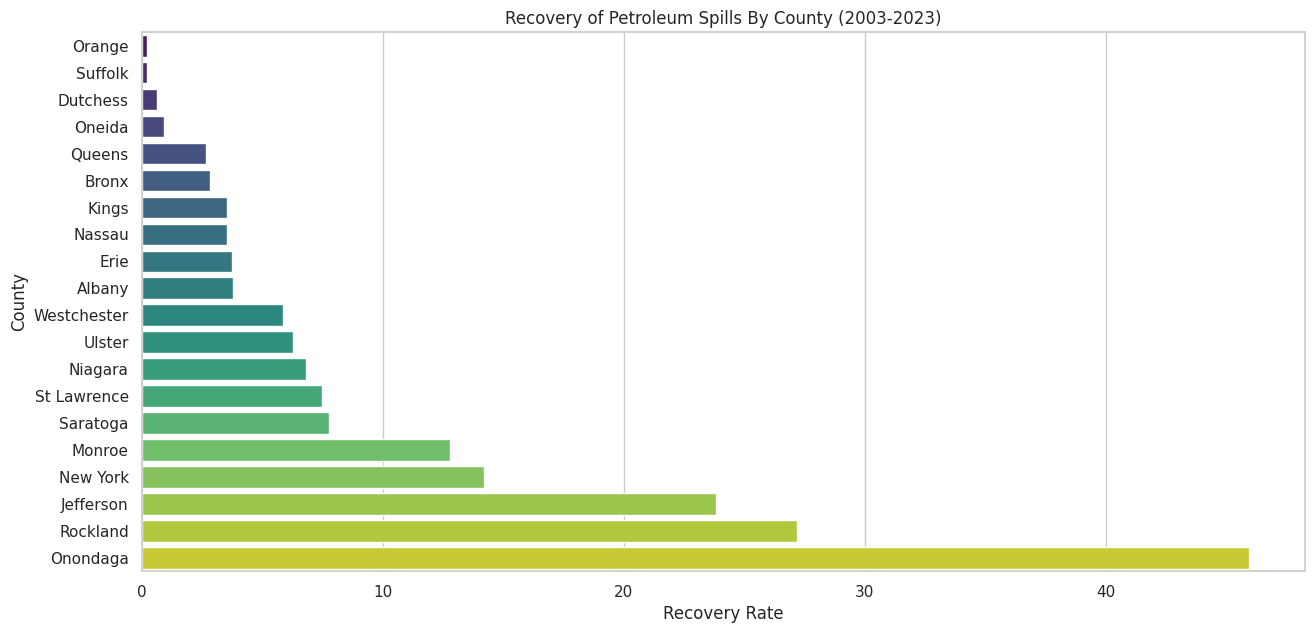

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

# Use the barplot function
ax = sns.barplot(y='county', x='spill_recovery_percentage', data=counties_recovery, palette="viridis")

# Customize the plot
ax.set_title('Recovery of Petroleum Spills By County (2003-2023)')
ax.set_xlabel('Recovery Rate')
ax.set_ylabel('County')

# Display the plot
plt.show()

__Step 2:__ Plot the results from eariler query to see the __Average Spill Resolution Time in Days__ by county

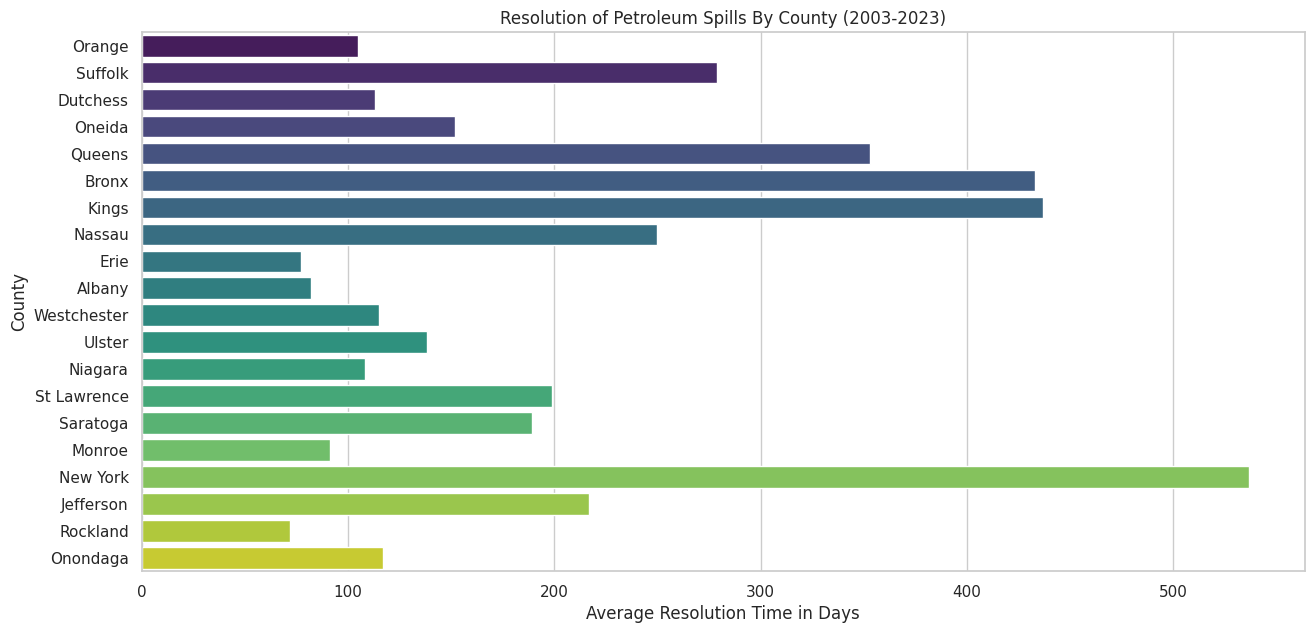

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a horizontal bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))

# Use the barplot functionavg_resolution_time_in_days
ax = sns.barplot(y='county', x='avg_resolution_time_in_days', data=counties_recovery, palette="viridis")

# Customize the plot
ax.set_title('Resolution of Petroleum Spills By County (2003-2023)')
ax.set_xlabel('Average Resolution Time in Days')
ax.set_ylabel('County')

# Display the plot
plt.show()

#### __Business Outcomes and Findings:__

* __Top Performer:__ From the first analysis we can see that __Onandaga__ county has the best recovery rate and also one of the best resolution times compared to others. This county could be used to see what works best for dealing with spills and use those techniques at other counties that suffer
* __Correlation Between Resolution Time and Recovery Rate:__ The counties with shorter average resolution times for petroleum spills do not necessarily show higher recovery rates, suggesting that quick resolution does not always equate to more effective recovery.

* __Discrepancies in County Responses:__ Some counties, like Saratoga and St. Lawrence, appear in both graphs with notable performance - lower resolution times and higher recovery rates, indicating a potentially more effective spill management approach.

* __Potential for Optimization:__ Counties with longer resolution times and lower recovery rates, such as Onondaga and Rockland, may benefit from examining the practices of counties like Saratoga and St. Lawrence to improve their spill management strategies.